In [1]:
import datetime
import mysql.connector
import operator
import numpy as np
from scipy import special

import matplotlib as mlp
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import matplotlib.dates as mdates 

import plotly as py
import plotly.graph_objs as go

import ipywidgets as widgets

import pandas as pd
import datetime
import seaborn as sb

In [2]:
sb.set()

In [3]:
py.offline.init_notebook_mode(connected = True)

### Time Series Plot of methane (Metabolite_id = 187)

In [4]:
cnx = mysql.connector.connect(user='root', password='root',
                              host='127.0.0.1',
                              database='bioeco')

sql_query = pd.read_sql_query('''select bioanalysis_metabolite_price.date, bioanalysis_metabolite_price.price, bioanalysis_metabolite_price.amount, bioanalysis_metabolite_price.unity, provider.name as provider_name
                                 from bioanalysis_metabolite_price
                                 JOIN provider 
                                 on provider.id = bioanalysis_metabolite_price.provider_id
                                 where metabolite_id = 187; ''', cnx, index_col = 'date', parse_dates=True)


df = pd.DataFrame(sql_query, columns=['price', 'amount', 'unity', 'provider_name'])
print(df)


                       price  amount unity                  provider_name
date                                                                     
2017-11-24 19:21:04    16.00   25.00     g            AK Scientific, Inc.
2017-11-24 19:21:04    19.80  100.00     g            AK Scientific, Inc.
2017-11-24 19:21:04    57.20  500.00     g            AK Scientific, Inc.
2017-11-24 19:21:04   103.00    1.00    kg            AK Scientific, Inc.
2017-11-24 19:21:04    19.80    5.00     g            AK Scientific, Inc.
2017-11-24 19:21:04    49.00   25.00     g            AK Scientific, Inc.
2017-11-24 19:21:04   122.57  100.00     g            AK Scientific, Inc.
2017-11-24 19:21:04   492.00  500.00     g            AK Scientific, Inc.
2017-11-24 19:21:04    89.00    5.00     g            AK Scientific, Inc.
2017-11-24 19:21:04    16.48    5.00     g            AK Scientific, Inc.
2017-11-24 19:21:04    37.68   25.00     g            AK Scientific, Inc.
2017-11-24 19:21:04   135.72  100.00  

In [5]:
df.unity.unique()

array(['g', 'kg', 'mg', 'ml', 'l', 'µmol'], dtype=object)

In [6]:
# Converter unidades 
for i in df.unity.unique():
    df.price = np.where(df.unity == i, df.price/df.amount, df.price)  # where True, yield x, otherwise yield y
    df.amount = np.where(df.unity == i, 1, df.amount)

print(df)


                         price  amount unity                  provider_name
date                                                                       
2017-11-24 19:21:04     0.6400     1.0     g            AK Scientific, Inc.
2017-11-24 19:21:04     0.1980     1.0     g            AK Scientific, Inc.
2017-11-24 19:21:04     0.1144     1.0     g            AK Scientific, Inc.
2017-11-24 19:21:04   103.0000     1.0    kg            AK Scientific, Inc.
2017-11-24 19:21:04     3.9600     1.0     g            AK Scientific, Inc.
2017-11-24 19:21:04     1.9600     1.0     g            AK Scientific, Inc.
2017-11-24 19:21:04     1.2257     1.0     g            AK Scientific, Inc.
2017-11-24 19:21:04     0.9840     1.0     g            AK Scientific, Inc.
2017-11-24 19:21:04    17.8000     1.0     g            AK Scientific, Inc.
2017-11-24 19:21:04     3.2960     1.0     g            AK Scientific, Inc.
2017-11-24 19:21:04     1.5072     1.0     g            AK Scientific, Inc.
2017-11-24 1

In [7]:
# Converter x gramas em 1g !!
df.price = np.where(df.unity == 'g', df.price/df.amount, df.price)  # where True, yield x, otherwise yield y
df.amount = np.where(df.unity == 'g', 1, df.amount)
print(df)

                         price  amount unity                  provider_name
date                                                                       
2017-11-24 19:21:04     0.6400     1.0     g            AK Scientific, Inc.
2017-11-24 19:21:04     0.1980     1.0     g            AK Scientific, Inc.
2017-11-24 19:21:04     0.1144     1.0     g            AK Scientific, Inc.
2017-11-24 19:21:04   103.0000     1.0    kg            AK Scientific, Inc.
2017-11-24 19:21:04     3.9600     1.0     g            AK Scientific, Inc.
2017-11-24 19:21:04     1.9600     1.0     g            AK Scientific, Inc.
2017-11-24 19:21:04     1.2257     1.0     g            AK Scientific, Inc.
2017-11-24 19:21:04     0.9840     1.0     g            AK Scientific, Inc.
2017-11-24 19:21:04    17.8000     1.0     g            AK Scientific, Inc.
2017-11-24 19:21:04     3.2960     1.0     g            AK Scientific, Inc.
2017-11-24 19:21:04     1.5072     1.0     g            AK Scientific, Inc.
2017-11-24 1

In [8]:
#See results grouped by provider_name
grouped_df = df.groupby(['unity','provider_name'])

for key, item in grouped_df:
    print('Unity, Provider:', key)
    print(grouped_df.get_group(key), "\n\n")

Unity, Provider: ('g', 'ACC Corporation')
                     price  amount unity    provider_name
date                                                     
2018-02-09 06:42:52  428.0     1.0     g  ACC Corporation
2018-02-09 06:42:52  224.6     1.0     g  ACC Corporation
2018-02-09 06:42:52  141.1     1.0     g  ACC Corporation
2018-03-09 08:11:14  428.0     1.0     g  ACC Corporation
2018-03-09 08:11:14  224.6     1.0     g  ACC Corporation
2018-03-09 08:11:14  141.1     1.0     g  ACC Corporation
2018-04-09 11:55:18  428.0     1.0     g  ACC Corporation
2018-04-09 11:55:18  224.6     1.0     g  ACC Corporation
2018-04-09 11:55:18  141.1     1.0     g  ACC Corporation
2018-05-09 13:53:56  428.0     1.0     g  ACC Corporation
2018-05-09 13:53:56  224.6     1.0     g  ACC Corporation
2018-05-09 13:53:56  141.1     1.0     g  ACC Corporation
2018-06-10 02:24:36  428.0     1.0     g  ACC Corporation
2018-06-10 02:24:36  224.6     1.0     g  ACC Corporation
2018-06-10 02:24:36  141.1    

                      price  amount unity                  provider_name
date                                                                    
2018-02-09 06:42:52   71.00     1.0     g  Enamine Ltd Chemspace partner
2018-02-09 06:42:52    4.96     1.0     g  Enamine Ltd Chemspace partner
2018-02-09 06:42:52   42.60     1.0     g  Enamine Ltd Chemspace partner
2018-02-09 06:42:52   33.90     1.0     g  Enamine Ltd Chemspace partner
2018-03-09 08:11:14   71.00     1.0     g  Enamine Ltd Chemspace partner
2018-03-09 08:11:14    4.96     1.0     g  Enamine Ltd Chemspace partner
2018-03-09 08:11:14   42.60     1.0     g  Enamine Ltd Chemspace partner
2018-03-09 08:11:14   33.90     1.0     g  Enamine Ltd Chemspace partner
2018-04-09 11:55:18   71.00     1.0     g  Enamine Ltd Chemspace partner
2018-04-09 11:55:18    4.96     1.0     g  Enamine Ltd Chemspace partner
2018-04-09 11:55:18   42.60     1.0     g  Enamine Ltd Chemspace partner
2018-04-09 11:55:18   33.90     1.0     g  Enamine 

                     price  amount unity          provider_name
date                                                           
2019-03-20 14:48:12  0.600     1.0     l  MedChemExpress Europe
2019-03-20 14:48:12  0.372     1.0     l  MedChemExpress Europe
2019-04-20 13:48:25  0.600     1.0     l  MedChemExpress Europe
2019-04-20 13:48:25  0.372     1.0     l  MedChemExpress Europe 


Unity, Provider: ('mg', 'Accela ChemBio Inc.')
                      price  amount unity        provider_name
date                                                          
2019-02-20 14:47:58  0.1716     1.0    mg  Accela ChemBio Inc.
2019-03-20 14:48:17  0.1716     1.0    mg  Accela ChemBio Inc.
2019-04-20 13:48:29  0.1716     1.0    mg  Accela ChemBio Inc. 


Unity, Provider: ('mg', 'Ambeed, Inc.')
                     price  amount unity provider_name
date                                                  
2019-04-20 13:48:29  1.078     1.0    mg  Ambeed, Inc.
2019-04-20 13:48:29  0.869     1.0    mg  A

                     price  amount unity          provider_name
date                                                           
2019-03-20 14:48:12   38.4     1.0    ml  MedChemExpress Europe
2019-04-20 13:48:25   38.4     1.0    ml  MedChemExpress Europe 


Unity, Provider: ('µmol', 'MedChemExpress')
                       price  amount unity   provider_name
date                                                      
2018-08-20 13:45:58    6.765     1.0  µmol  MedChemExpress
2018-08-20 13:45:58   42.312     1.0  µmol  MedChemExpress
2018-08-20 13:45:58   62.484     1.0  µmol  MedChemExpress
2018-08-20 13:45:58    6.765     1.0  µmol  MedChemExpress
2018-08-20 13:45:58  913.767     1.0  µmol  MedChemExpress
2018-09-20 13:47:07    6.765     1.0  µmol  MedChemExpress
2018-09-20 13:47:07   42.312     1.0  µmol  MedChemExpress
2018-09-20 13:47:07   62.484     1.0  µmol  MedChemExpress
2018-09-20 13:47:07    6.765     1.0  µmol  MedChemExpress
2018-09-20 13:47:07  913.767     1.0  µmol  MedC

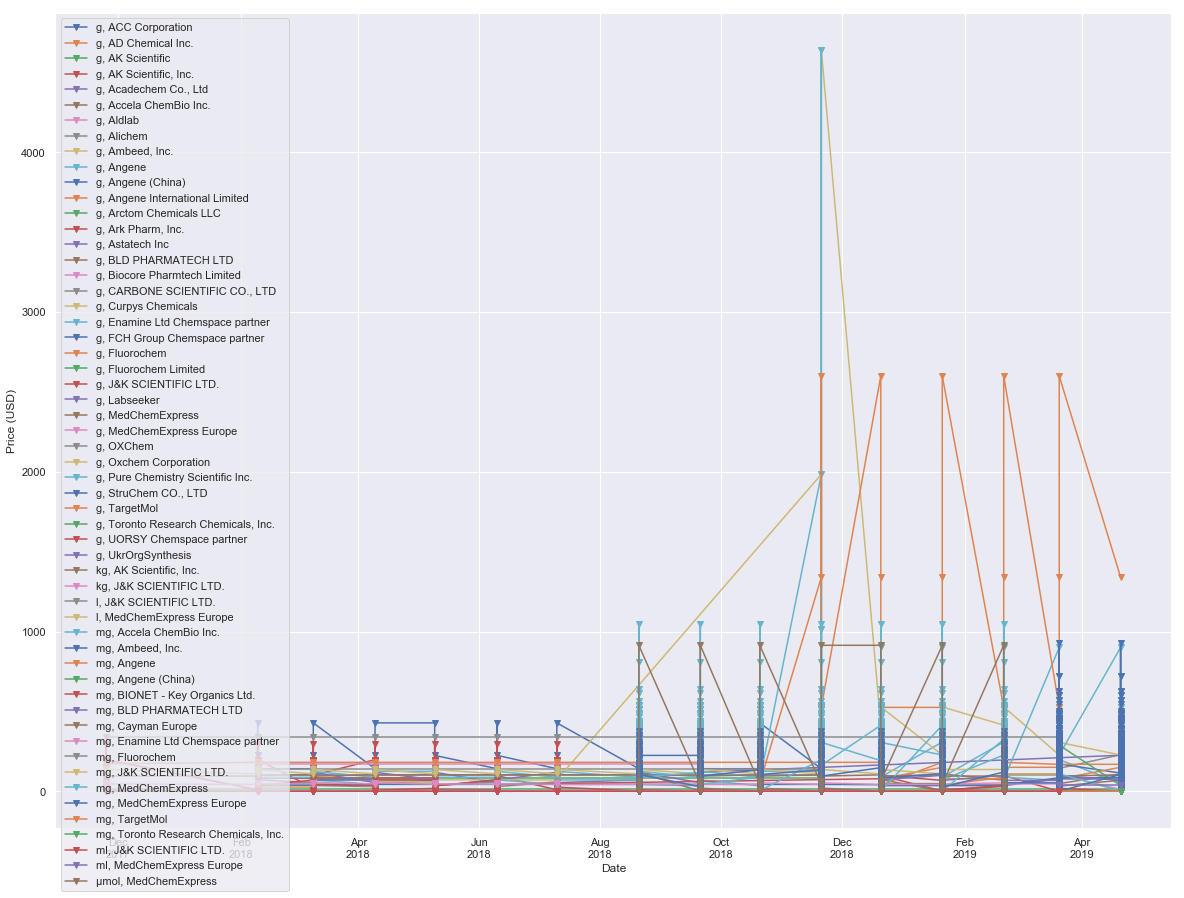

In [9]:
#Create plot!!
df = df.sort_index()

fig, ax = plt.subplots(figsize=(20, 15))
for k,g in df.groupby(['unity','provider_name'])['price']:
    ax.plot_date(pd.to_datetime(g.index),g,'v-',label="{}, {}".format(*k))

#ax.xaxis.set_major_locator(mdates.MonthLocator(interval=3))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b\n%Y'))
ax.legend(loc='best')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.show()

In [10]:
#Create plot with plotly

df = df.sort_index()


layout = go.Layout(
    title = 'Time Series Plot of Methane',
    yaxis = dict(
        title = 'price(USD)'
    ),
    xaxis = dict(
        title = 'date'
    )
)


opt_list = []
for key, item in grouped_df:
#     print('key:', key)
    opt_list.append(str(key[0] + ' ' + key[1]))

# print('opt_list:', opt_list)
    

d_x = {}
d_y = {}
for k,g in df.groupby(['unity','provider_name'])['price']:
    x = pd.to_datetime(g.index)
    y = g.values
    k = str(k[0] + ' ' + k[1])
#     print('k: ', k)
    if k not in d_x and k not in d_y:
        d_x[k] = x
        d_y[k] = y
#         print(d_x)
#         print(d_y)
    elif k in d_x and k in d_y:
        d_x[k].append(x)
        d_y[k].append(y)
    else: print('There is a unity,provider lacking on the x or y dict.')
    
    
def update_plot(unity):#, freq):
   data = []
   for s in unity:
       trace1 = go.Scatter(
           x = d_x[s],
           y = d_y[s],
           mode = 'lines',
           name = 'u, p {}'.format(s),
           line = dict(
               shape = 'spline' #smooth line
           )
       )
       data.append(trace1)
    
   fig = go.Figure(data = data, layout= layout)
   py.offline.iplot(fig)

    
unity = widgets.SelectMultiple(options = opt_list, description = 'Unity, Prov') #value = key_list,
#freq = widgets.FloatSlider(min=1, max=20, value=1, description = 'Freq')
widgets.interactive(update_plot, unity = unity )#, freq = freq)

interactive(children=(SelectMultiple(description='Unity, Prov', options=('g ACC Corporation', 'g AD Chemical I…

Neste caso o provider oxchem é o que tem o preço mais baixo para a gama dos gramas.